<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [144]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [147]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [148]:
df_describe = list()
"""for one in feature_cols:
    df_describe.append(data[one].describe())
    
for one in df_describe:
    print(one)
"""
    
data.isna().sum()
   
"""for one in feature_cols:
    print(data[one].value_counts(dropna=False))
    print()
"""
    
df = data.isna().sum()#вроде нет нанов

"""for one in feature_cols:
    print(one)
    print(sorted(data[one].unique()))"""#Total spent есть ' ' посчитаем их
print(len(data[data['TotalSpent'] ==' ']), 'TotalSpent')
df[2] = 9

df

9 TotalSpent


ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

C:\Users\Ivan\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


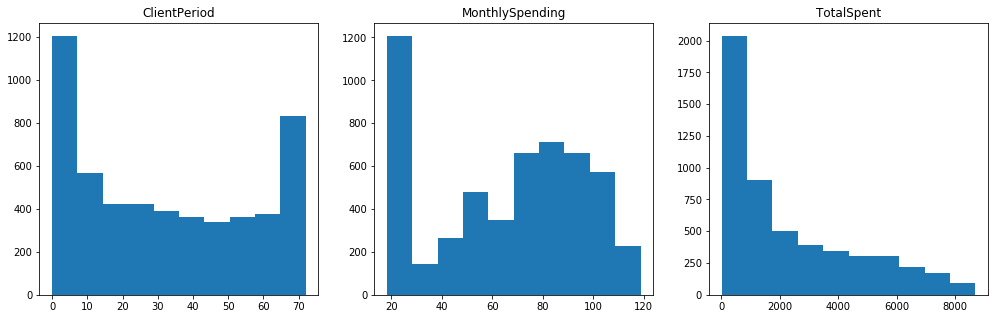

In [149]:
# YOUR CODE для вещественных признаков посмотрим распределение ниже для категориальных
fig, axs = plt.subplots(1,3,figsize = (17,5))

for index, parametr in enumerate(num_cols):   
    axs[index].hist(data[data[parametr] != ' '][parametr].astype('float'))
    axs[index].set_title(parametr)


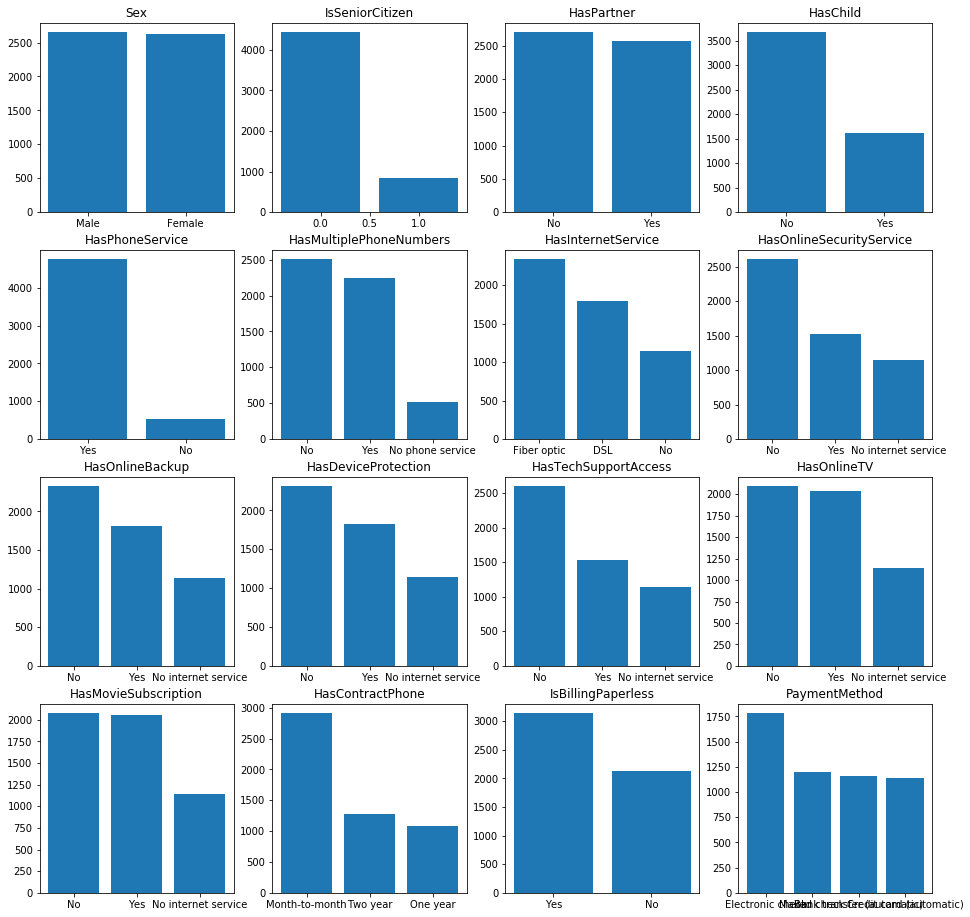

In [150]:
fig, axs = plt.subplots(4,4,figsize=(16,16))

for index, parametr in enumerate(cat_cols):
    x = int(index/4)
    y = int(index %4)
    df = data[parametr].value_counts()
    axs[x,y].bar(list(df._index),list(df[:]))
    axs[x,y].set_title(parametr)

0    3898
1    1384
Name: Churn, dtype: int64


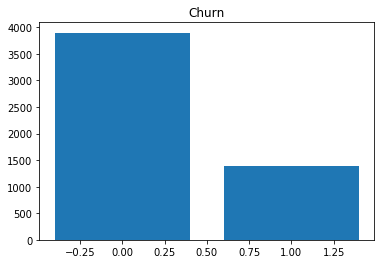

In [151]:
#посмотрим на итоговую переменную которую должны прдсказать можно видеть что соотношение между ними примерно 2.5 / 1 что 
# говорит что они достаточно сбалансированные можно конечно попробовать дополнить чтобы они лучше соотносились, но это после
df = data['Churn'].value_counts()
plt.bar(list(df._index),list(df[:]))
plt.title('Churn')
print(df)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [152]:
# YOUR CODE убрал строки в котрых есть пропуски в total spent

data = data.replace(' ', np.nan)

data['TotalSpent'] = data['TotalSpent'].astype(float)




## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [153]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [109]:
X_num = data[num_cols]
X_cat = data[cat_cols]


#решил сделать в паyдас onehotencoding чтобы не переводить в формат массивов numpy
X_cat_dummy = pd.get_dummies(X_cat)
print(len(X_cat_dummy))

#нормализация числовых переменных
scaler = StandardScaler()
X_num_norm = scaler.fit_transform(X_num.values)
print(len(X_num_norm))
X_scaled_norm = pd.DataFrame(X_num_norm,columns = num_cols)



X_scaled = np.hstack((X_scaled_norm, X_cat_dummy))
X_scaled


5273
5273


array([[ 0.91909879, -1.50643567, -0.55758153, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.61206004, -1.29599691, -0.18476315, ...,  1.        ,
         0.        ,  0.        ],
       [-1.28207223,  0.36265822, -0.9765036 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.28207223, -0.32831   , -0.98569348, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1407243 ,  0.36597222, -0.03355981, ...,  1.        ,
         0.        ,  0.        ],
       [-0.54834856,  0.36265822, -0.40364547, ...,  0.        ,
         0.        ,  1.        ]])

In [154]:



clf = LogisticRegression()
param_grid = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}


model = GridSearchCV(clf,param_grid = param_grid, cv = 5, scoring = 'roc_auc')
model.fit(X_scaled, Y)

best_result = model.best_score_
best_model = model.best_estimator_
print(best_result)
print(best_model)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.844824773898181
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [155]:
#лучший результат roc_auc = 0.8448
# model LogisticRegression C =100 penalty='l2'

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [156]:
X = data[num_cols + cat_cols]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4623,37,104.50,3778.00,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic)
4167,11,72.90,818.45,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check
3620,67,93.15,6368.20,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check
1158,3,91.50,242.95,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
1703,30,74.85,2181.75,Male,1,Yes,No,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,Two year,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,54,20.05,1102.40,Female,0,Yes,No,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic)
3777,41,45.20,1841.90,Female,0,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic)
5200,13,30.85,394.10,Female,0,No,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
5235,46,72.80,3249.40,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic)


In [138]:
depths = [4,5,6]
learning_rates =[i*0.001 for i in range(1, 100)]
iterations = [i * 5 for i in range(1,10)]

answer = list()
for learning_rate in learning_rates:
        
    model = CatBoostClassifier(iterations=20, learning_rate=learning_rate, depth=4)
    
    model.fit(X_train, y_train,cat_cols)

    predict = model.predict_proba(X_test)
    print('rate=', learning_rate, ' ', 'depth= ', 4, ' etrations = ', 30)
    print(roc_auc_score(y_test,predict[:,1]))
    answer.append(roc_auc_score(y_test,predict[:,1]))
    print()


    
    



0:	learn: 0.6927733	total: 9.23ms	remaining: 175ms
1:	learn: 0.6924040	total: 18.1ms	remaining: 163ms
2:	learn: 0.6920326	total: 26.1ms	remaining: 148ms
3:	learn: 0.6916687	total: 59.4ms	remaining: 237ms
4:	learn: 0.6912964	total: 75.3ms	remaining: 226ms
5:	learn: 0.6909184	total: 85ms	remaining: 198ms
6:	learn: 0.6905559	total: 93.1ms	remaining: 173ms
7:	learn: 0.6901870	total: 103ms	remaining: 154ms
8:	learn: 0.6898120	total: 113ms	remaining: 138ms
9:	learn: 0.6894725	total: 121ms	remaining: 121ms
10:	learn: 0.6891080	total: 130ms	remaining: 106ms
11:	learn: 0.6887376	total: 139ms	remaining: 92.7ms
12:	learn: 0.6883850	total: 148ms	remaining: 79.5ms
13:	learn: 0.6880346	total: 157ms	remaining: 67.1ms
14:	learn: 0.6876723	total: 170ms	remaining: 56.7ms
15:	learn: 0.6873370	total: 187ms	remaining: 46.7ms
16:	learn: 0.6869719	total: 200ms	remaining: 35.4ms
17:	learn: 0.6866160	total: 223ms	remaining: 24.8ms
18:	learn: 0.6862438	total: 235ms	remaining: 12.4ms
19:	learn: 0.6858945	total: 

0.8087894364438525

0:	learn: 0.6897953	total: 28.9ms	remaining: 549ms
1:	learn: 0.6865291	total: 54.3ms	remaining: 489ms
2:	learn: 0.6832918	total: 75.3ms	remaining: 427ms
3:	learn: 0.6801806	total: 83.9ms	remaining: 336ms
4:	learn: 0.6770237	total: 96ms	remaining: 288ms
5:	learn: 0.6738632	total: 107ms	remaining: 249ms
6:	learn: 0.6708761	total: 115ms	remaining: 214ms
7:	learn: 0.6678840	total: 126ms	remaining: 189ms
8:	learn: 0.6648775	total: 134ms	remaining: 163ms
9:	learn: 0.6621950	total: 146ms	remaining: 146ms
10:	learn: 0.6593598	total: 156ms	remaining: 128ms
11:	learn: 0.6565548	total: 177ms	remaining: 118ms
12:	learn: 0.6538878	total: 185ms	remaining: 99.8ms
13:	learn: 0.6512118	total: 193ms	remaining: 82.9ms
14:	learn: 0.6485465	total: 201ms	remaining: 67.1ms
15:	learn: 0.6460925	total: 209ms	remaining: 52.2ms
16:	learn: 0.6436455	total: 217ms	remaining: 38.2ms
17:	learn: 0.6411186	total: 225ms	remaining: 25ms
18:	learn: 0.6385064	total: 232ms	remaining: 12.2ms
19:	learn: 0.

1:	learn: 0.6807779	total: 24.7ms	remaining: 222ms
2:	learn: 0.6748556	total: 56.6ms	remaining: 321ms
3:	learn: 0.6692202	total: 80.6ms	remaining: 322ms
4:	learn: 0.6636032	total: 89.7ms	remaining: 269ms
5:	learn: 0.6580549	total: 97.4ms	remaining: 227ms
6:	learn: 0.6528880	total: 106ms	remaining: 196ms
7:	learn: 0.6477873	total: 113ms	remaining: 169ms
8:	learn: 0.6428009	total: 121ms	remaining: 148ms
9:	learn: 0.6383495	total: 128ms	remaining: 128ms
10:	learn: 0.6337093	total: 136ms	remaining: 111ms
11:	learn: 0.6291512	total: 143ms	remaining: 95.3ms
12:	learn: 0.6248983	total: 151ms	remaining: 81.3ms
13:	learn: 0.6205959	total: 158ms	remaining: 67.9ms
14:	learn: 0.6164814	total: 167ms	remaining: 55.5ms
15:	learn: 0.6124269	total: 176ms	remaining: 44.1ms
16:	learn: 0.6088979	total: 186ms	remaining: 32.8ms
17:	learn: 0.6050337	total: 199ms	remaining: 22.1ms
18:	learn: 0.6011022	total: 209ms	remaining: 11ms
19:	learn: 0.5973388	total: 218ms	remaining: 0us
rate= 0.017   depth=  4  etrati

18:	learn: 0.5745521	total: 185ms	remaining: 9.74ms
19:	learn: 0.5702843	total: 197ms	remaining: 0us
rate= 0.024   depth=  4  etrations =  30
0.816988887039041

0:	learn: 0.6839078	total: 7.18ms	remaining: 137ms
1:	learn: 0.6751481	total: 24.4ms	remaining: 220ms
2:	learn: 0.6667129	total: 37.5ms	remaining: 213ms
3:	learn: 0.6588084	total: 56.5ms	remaining: 226ms
4:	learn: 0.6510085	total: 65.6ms	remaining: 197ms
5:	learn: 0.6434089	total: 73.9ms	remaining: 172ms
6:	learn: 0.6364226	total: 81.8ms	remaining: 152ms
7:	learn: 0.6295242	total: 89.8ms	remaining: 135ms
8:	learn: 0.6229318	total: 97.7ms	remaining: 119ms
9:	learn: 0.6171202	total: 106ms	remaining: 106ms
10:	learn: 0.6111479	total: 113ms	remaining: 92.7ms
11:	learn: 0.6053217	total: 123ms	remaining: 81.9ms
12:	learn: 0.5997686	total: 134ms	remaining: 72.2ms
13:	learn: 0.5945552	total: 142ms	remaining: 61ms
14:	learn: 0.5895471	total: 151ms	remaining: 50.2ms
15:	learn: 0.5845635	total: 160ms	remaining: 40ms
16:	learn: 0.5802153	t

rate= 0.032   depth=  4  etrations =  30
0.8210261799716974

0:	learn: 0.6809984	total: 7.46ms	remaining: 142ms
1:	learn: 0.6696376	total: 14.4ms	remaining: 130ms
2:	learn: 0.6588531	total: 21.2ms	remaining: 120ms
3:	learn: 0.6488582	total: 29.2ms	remaining: 117ms
4:	learn: 0.6391422	total: 37.1ms	remaining: 111ms
5:	learn: 0.6297968	total: 44.7ms	remaining: 104ms
6:	learn: 0.6213186	total: 52.5ms	remaining: 97.5ms
7:	learn: 0.6131922	total: 60.6ms	remaining: 90.9ms
8:	learn: 0.6054186	total: 68.3ms	remaining: 83.5ms
9:	learn: 0.5986303	total: 76.1ms	remaining: 76.1ms
10:	learn: 0.5919642	total: 83.8ms	remaining: 68.5ms
11:	learn: 0.5852936	total: 91.7ms	remaining: 61.1ms
12:	learn: 0.5792806	total: 99.8ms	remaining: 53.7ms
13:	learn: 0.5733303	total: 108ms	remaining: 46.2ms
14:	learn: 0.5675959	total: 115ms	remaining: 38.5ms
15:	learn: 0.5620394	total: 124ms	remaining: 31ms
16:	learn: 0.5573025	total: 135ms	remaining: 23.9ms
17:	learn: 0.5521196	total: 145ms	remaining: 16.1ms
18:	lear

19:	learn: 0.5231171	total: 204ms	remaining: 0us
rate= 0.04   depth=  4  etrations =  30
0.8240364605011238

0:	learn: 0.6781119	total: 7.15ms	remaining: 136ms
1:	learn: 0.6642439	total: 17.2ms	remaining: 155ms
2:	learn: 0.6512660	total: 34.4ms	remaining: 195ms
3:	learn: 0.6393672	total: 46.9ms	remaining: 188ms
4:	learn: 0.6279705	total: 54.7ms	remaining: 164ms
5:	learn: 0.6171454	total: 62.6ms	remaining: 146ms
6:	learn: 0.6074500	total: 70.7ms	remaining: 131ms
7:	learn: 0.5979816	total: 78.7ms	remaining: 118ms
8:	learn: 0.5892377	total: 86.5ms	remaining: 106ms
9:	learn: 0.5813731	total: 94.4ms	remaining: 94.4ms
10:	learn: 0.5740707	total: 102ms	remaining: 83.6ms
11:	learn: 0.5668381	total: 110ms	remaining: 73.4ms
12:	learn: 0.5600942	total: 118ms	remaining: 63.4ms
13:	learn: 0.5537857	total: 130ms	remaining: 55.7ms
14:	learn: 0.5479016	total: 144ms	remaining: 47.9ms
15:	learn: 0.5420480	total: 155ms	remaining: 38.6ms
16:	learn: 0.5371679	total: 167ms	remaining: 29.4ms
17:	learn: 0.531

10:	learn: 0.5611488	total: 225ms	remaining: 184ms
11:	learn: 0.5535916	total: 239ms	remaining: 160ms
12:	learn: 0.5469577	total: 251ms	remaining: 135ms
13:	learn: 0.5403460	total: 261ms	remaining: 112ms
14:	learn: 0.5341888	total: 272ms	remaining: 90.6ms
15:	learn: 0.5282374	total: 282ms	remaining: 70.5ms
16:	learn: 0.5229598	total: 295ms	remaining: 52ms
17:	learn: 0.5176772	total: 314ms	remaining: 34.9ms
18:	learn: 0.5117247	total: 333ms	remaining: 17.5ms
19:	learn: 0.5065495	total: 343ms	remaining: 0us
rate= 0.048   depth=  4  etrations =  30
0.8245879463914093

0:	learn: 0.6752483	total: 10.9ms	remaining: 207ms
1:	learn: 0.6593708	total: 20ms	remaining: 180ms
2:	learn: 0.6443103	total: 35.7ms	remaining: 202ms
3:	learn: 0.6306918	total: 52.5ms	remaining: 210ms
4:	learn: 0.6181208	total: 68ms	remaining: 204ms
5:	learn: 0.6059579	total: 85ms	remaining: 198ms
6:	learn: 0.5952017	total: 102ms	remaining: 189ms
7:	learn: 0.5847953	total: 120ms	remaining: 181ms
8:	learn: 0.5751383	total: 1

4:	learn: 0.6088601	total: 38ms	remaining: 114ms
5:	learn: 0.5958074	total: 64.3ms	remaining: 150ms
6:	learn: 0.5843807	total: 84.4ms	remaining: 157ms
7:	learn: 0.5733351	total: 101ms	remaining: 152ms
8:	learn: 0.5634256	total: 113ms	remaining: 138ms
9:	learn: 0.5553416	total: 125ms	remaining: 125ms
10:	learn: 0.5474474	total: 133ms	remaining: 109ms
11:	learn: 0.5394046	total: 143ms	remaining: 95.3ms
12:	learn: 0.5323038	total: 151ms	remaining: 81.1ms
13:	learn: 0.5257694	total: 162ms	remaining: 69.4ms
14:	learn: 0.5195352	total: 171ms	remaining: 57ms
15:	learn: 0.5136574	total: 182ms	remaining: 45.6ms
16:	learn: 0.5084173	total: 195ms	remaining: 34.3ms
17:	learn: 0.5030770	total: 204ms	remaining: 22.7ms
18:	learn: 0.4971086	total: 215ms	remaining: 11.3ms
19:	learn: 0.4919551	total: 229ms	remaining: 0us
rate= 0.056   depth=  4  etrations =  30
0.8276055106967453

0:	learn: 0.6724075	total: 22.8ms	remaining: 434ms
1:	learn: 0.6542624	total: 36.6ms	remaining: 329ms
2:	learn: 0.6370103	to

0:	learn: 0.6699405	total: 12.4ms	remaining: 235ms
1:	learn: 0.6498813	total: 20.5ms	remaining: 184ms
2:	learn: 0.6313372	total: 32.2ms	remaining: 182ms
3:	learn: 0.6149051	total: 46.9ms	remaining: 188ms
4:	learn: 0.6002482	total: 60.3ms	remaining: 181ms
5:	learn: 0.5862326	total: 71.7ms	remaining: 167ms
6:	learn: 0.5740865	total: 83.3ms	remaining: 155ms
7:	learn: 0.5624614	total: 95.7ms	remaining: 144ms
8:	learn: 0.5519652	total: 114ms	remaining: 139ms
9:	learn: 0.5430372	total: 145ms	remaining: 145ms
10:	learn: 0.5349867	total: 181ms	remaining: 148ms
11:	learn: 0.5267229	total: 195ms	remaining: 130ms
12:	learn: 0.5200383	total: 209ms	remaining: 113ms
13:	learn: 0.5135057	total: 224ms	remaining: 96.2ms
14:	learn: 0.5073497	total: 236ms	remaining: 78.7ms
15:	learn: 0.5007342	total: 244ms	remaining: 61.1ms
16:	learn: 0.4945667	total: 253ms	remaining: 44.7ms
17:	learn: 0.4889020	total: 261ms	remaining: 29ms
18:	learn: 0.4834360	total: 270ms	remaining: 14.2ms
19:	learn: 0.4782800	total: 2

12:	learn: 0.5099596	total: 136ms	remaining: 73ms
13:	learn: 0.5026049	total: 160ms	remaining: 68.7ms
14:	learn: 0.4951137	total: 173ms	remaining: 57.8ms
15:	learn: 0.4885890	total: 185ms	remaining: 46.2ms
16:	learn: 0.4828114	total: 195ms	remaining: 34.3ms
17:	learn: 0.4774269	total: 204ms	remaining: 22.7ms
18:	learn: 0.4722202	total: 217ms	remaining: 11.4ms
19:	learn: 0.4679626	total: 233ms	remaining: 0us
rate= 0.07100000000000001   depth=  4  etrations =  30
0.8294961708149505

0:	learn: 0.6671425	total: 15.4ms	remaining: 293ms
1:	learn: 0.6449741	total: 34.5ms	remaining: 311ms
2:	learn: 0.6254808	total: 74.5ms	remaining: 422ms
3:	learn: 0.6075802	total: 99.9ms	remaining: 400ms
4:	learn: 0.5922733	total: 114ms	remaining: 342ms
5:	learn: 0.5774169	total: 129ms	remaining: 301ms
6:	learn: 0.5647921	total: 137ms	remaining: 255ms
7:	learn: 0.5527235	total: 145ms	remaining: 218ms
8:	learn: 0.5419916	total: 153ms	remaining: 188ms
9:	learn: 0.5329765	total: 161ms	remaining: 161ms
10:	learn:

9:	learn: 0.5257360	total: 94.9ms	remaining: 94.9ms
10:	learn: 0.5177012	total: 111ms	remaining: 90.9ms
11:	learn: 0.5100257	total: 124ms	remaining: 82.8ms
12:	learn: 0.5013759	total: 133ms	remaining: 71.5ms
13:	learn: 0.4939795	total: 143ms	remaining: 61.3ms
14:	learn: 0.4863709	total: 152ms	remaining: 50.5ms
15:	learn: 0.4798812	total: 160ms	remaining: 40ms
16:	learn: 0.4740841	total: 168ms	remaining: 29.7ms
17:	learn: 0.4689016	total: 176ms	remaining: 19.6ms
18:	learn: 0.4639219	total: 184ms	remaining: 9.69ms
19:	learn: 0.4599133	total: 192ms	remaining: 0us
rate= 0.079   depth=  4  etrations =  30
0.8294160492799468

0:	learn: 0.6643674	total: 7.69ms	remaining: 146ms
1:	learn: 0.6401714	total: 16.6ms	remaining: 149ms
2:	learn: 0.6191615	total: 25.9ms	remaining: 147ms
3:	learn: 0.6000640	total: 35.7ms	remaining: 143ms
4:	learn: 0.5839761	total: 44.3ms	remaining: 133ms
5:	learn: 0.5685079	total: 54.4ms	remaining: 127ms
6:	learn: 0.5564662	total: 65ms	remaining: 121ms
7:	learn: 0.54405

11:	learn: 0.5009021	total: 117ms	remaining: 77.8ms
12:	learn: 0.4929150	total: 138ms	remaining: 74.5ms
13:	learn: 0.4855691	total: 148ms	remaining: 63.6ms
14:	learn: 0.4781514	total: 159ms	remaining: 52.9ms
15:	learn: 0.4718503	total: 169ms	remaining: 42.3ms
16:	learn: 0.4662909	total: 181ms	remaining: 31.9ms
17:	learn: 0.4613370	total: 190ms	remaining: 21.1ms
18:	learn: 0.4565902	total: 198ms	remaining: 10.4ms
19:	learn: 0.4526122	total: 207ms	remaining: 0us
rate= 0.08700000000000001   depth=  4  etrations =  30
0.8299769000249729

0:	learn: 0.6616151	total: 7.33ms	remaining: 139ms
1:	learn: 0.6354711	total: 14.4ms	remaining: 130ms
2:	learn: 0.6130523	total: 22.6ms	remaining: 128ms
3:	learn: 0.5928771	total: 32.7ms	remaining: 131ms
4:	learn: 0.5761335	total: 42.8ms	remaining: 128ms
5:	learn: 0.5601814	total: 53.5ms	remaining: 125ms
6:	learn: 0.5479084	total: 61.9ms	remaining: 115ms
7:	learn: 0.5352865	total: 71.4ms	remaining: 107ms
8:	learn: 0.5242296	total: 94.6ms	remaining: 116ms
9

10:	learn: 0.4967627	total: 114ms	remaining: 93.3ms
11:	learn: 0.4876269	total: 126ms	remaining: 84.2ms
12:	learn: 0.4809662	total: 132ms	remaining: 70.8ms
13:	learn: 0.4740838	total: 142ms	remaining: 60.7ms
14:	learn: 0.4677625	total: 152ms	remaining: 50.7ms
15:	learn: 0.4626479	total: 176ms	remaining: 43.9ms
16:	learn: 0.4571608	total: 189ms	remaining: 33.3ms
17:	learn: 0.4529720	total: 202ms	remaining: 22.5ms
18:	learn: 0.4487645	total: 216ms	remaining: 11.4ms
19:	learn: 0.4449782	total: 231ms	remaining: 0us
rate= 0.095   depth=  4  etrations =  30
0.8294961708149505

0:	learn: 0.6588855	total: 8.97ms	remaining: 170ms
1:	learn: 0.6308713	total: 17.4ms	remaining: 157ms
2:	learn: 0.6071458	total: 25.2ms	remaining: 143ms
3:	learn: 0.5860039	total: 34.6ms	remaining: 138ms
4:	learn: 0.5682796	total: 43.8ms	remaining: 131ms
5:	learn: 0.5518769	total: 52.9ms	remaining: 124ms
6:	learn: 0.5375073	total: 62ms	remaining: 115ms
7:	learn: 0.5255719	total: 71ms	remaining: 107ms
8:	learn: 0.514858

In [157]:

maxim= 0.5
ind = 1
for i in range(len(answer)):
    if answer[i] > maxim:
        maxim = answer[i]
        ind = i +1
print(maxim, ind)
print(answer)

0.8323836676933323 96
[0.8064346957462749, 0.806173520352951, 0.8057437775742945, 0.8061537501040539, 0.8064856821776409, 0.8072973029218348, 0.807574086406393, 0.8087894364438525, 0.8087467743278115, 0.8097862732040291, 0.8085178556563722, 0.8081869641222009, 0.8104303671023059, 0.8101910430367103, 0.8104282860234746, 0.8104657454424373, 0.813908890368767, 0.8139692416548739, 0.8111982851910431, 0.811042204278698, 0.815908807125614, 0.816038874552568, 0.8162917256305668, 0.816988887039041, 0.8192437359527178, 0.8203966536252393, 0.8204840589361526, 0.8207535586448014, 0.8207951802214268, 0.821770165653875, 0.8209866394739032, 0.8210261799716974, 0.822615083659369, 0.8211864230417047, 0.8213497877299593, 0.8219668276034295, 0.8219980437858986, 0.8218658952801131, 0.824299716973279, 0.8240364605011238, 0.8239303254807292, 0.8228325563972363, 0.8239729875967701, 0.8240603929076834, 0.8241165820361276, 0.8238502039457255, 0.8238730958128693, 0.8245879463914093, 0.8274036460501124, 0.82778

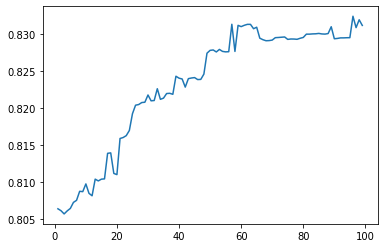

In [158]:
x_ = list([i for i in range(1,100)])
plt.plot(x_, answer)


In [169]:
model = CatBoostClassifier(iterations=100, learning_rate=0.096, depth=4)
model.fit(X_train, y_train,cat_cols)

0:	learn: 0.6593677	total: 12.1ms	remaining: 1.19s
1:	learn: 0.6305004	total: 26ms	remaining: 1.28s
2:	learn: 0.6059009	total: 34.9ms	remaining: 1.13s
3:	learn: 0.5875497	total: 44.3ms	remaining: 1.06s
4:	learn: 0.5693060	total: 54.6ms	remaining: 1.04s
5:	learn: 0.5519661	total: 63.4ms	remaining: 993ms
6:	learn: 0.5370052	total: 70.3ms	remaining: 934ms
7:	learn: 0.5248851	total: 80.8ms	remaining: 930ms
8:	learn: 0.5136943	total: 95.6ms	remaining: 966ms
9:	learn: 0.5037061	total: 109ms	remaining: 983ms
10:	learn: 0.4943782	total: 121ms	remaining: 975ms
11:	learn: 0.4865776	total: 131ms	remaining: 963ms
12:	learn: 0.4796096	total: 143ms	remaining: 954ms
13:	learn: 0.4731806	total: 152ms	remaining: 936ms
14:	learn: 0.4673235	total: 163ms	remaining: 921ms
15:	learn: 0.4620421	total: 174ms	remaining: 911ms
16:	learn: 0.4564663	total: 185ms	remaining: 903ms
17:	learn: 0.4516133	total: 198ms	remaining: 901ms
18:	learn: 0.4477664	total: 213ms	remaining: 907ms
19:	learn: 0.4442878	total: 229ms	

In [172]:
#лучшая модель с depth = 4 и rate = 0.3 в принципе можно еще поребирать но roc_auc =0.8413947390327147
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.8349900890506198

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [173]:
best_model = model
model

In [174]:
X_new_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')



X_new_test = X_new_test.replace(' ', np.nan)


X_new_test['TotalSpent'] = X_new_test['TotalSpent'].astype(float)
X_new_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.80,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [175]:
submission['Churn'] =   best_model.predict(X_new_test) #best_model.predict_proba(X_test) #/
result = best_model.predict(X_new_test)
submission.to_csv('./my_submission.csv', index = False)

In [176]:
result

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.